<a href="https://colab.research.google.com/github/jessiejxyu2/ist526/blob/main/Question_2__time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Essential Libraries

In [ ]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

# Mount Google Drive

In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
df_stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Copy of AAPL.csv', parse_dates=True, index_col = "Date")

# adding Date as column and index
df_stock['Date'] = df_stock.index

df = df_stock

# adding daily interval
df.index = pd.DatetimeIndex(df.index).to_period('D')

# display
display(df_stock.head())
display(df_stock.tail())

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2010-04-19,8.822500,8.853214,8.634643,8.823929,7.555702,566924400,2010-04-19
2010-04-20,8.876429,8.901786,8.677143,8.735357,7.479861,738326400,2010-04-20
2010-04-21,9.242857,9.294643,9.133214,9.257857,7.927264,982391200,2010-04-21
2010-04-22,9.222857,9.526786,9.150000,9.516786,8.148975,793424800,2010-04-22
2010-04-23,9.571071,9.720714,9.535714,9.672500,8.282313,796955600,2010-04-23


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2022-04-08,171.779999,171.779999,169.199997,170.089996,170.089996,76515900,2022-04-08
2022-04-11,168.710007,169.029999,165.500000,165.750000,165.750000,72246700,2022-04-11
2022-04-12,168.020004,169.869995,166.639999,167.660004,167.660004,79265200,2022-04-12
2022-04-13,167.389999,171.039993,166.770004,170.399994,170.399994,70618900,2022-04-13
2022-04-14,170.619995,171.270004,165.039993,165.289993,165.289993,75237500,2022-04-14


## Simulating AR(1) Process
$X_t = 0.5 \times X_{t-1} + w_t$ \\



In [ ]:
from numpy.random import default_rng
rng = default_rng(12345)


n_points = 200
ar_factor = 0.5
w_std = 2.0
X_t = np.zeros(n_points)

for i in range(1, n_points):
  X_t[i] = ar_factor * X_t[i-1] + rng.normal(0, w_std)

# create a data-frame
dates = pd.date_range(start='2020-06-20', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

,Date,X
2020-06-20,2020-06-20,0.000000
2020-06-21,2020-06-21,-2.847650
2020-06-22,2020-06-22,1.103632
2020-06-23,2020-06-23,-1.189508
2020-06-24,2020-06-24,-1.113100
...,...,...
2021-01-01,2021-01-01,0.069999
2021-01-02,2021-01-02,1.407365
2021-01-03,2021-01-03,3.133692
2021-01-04,2021-01-04,1.998965


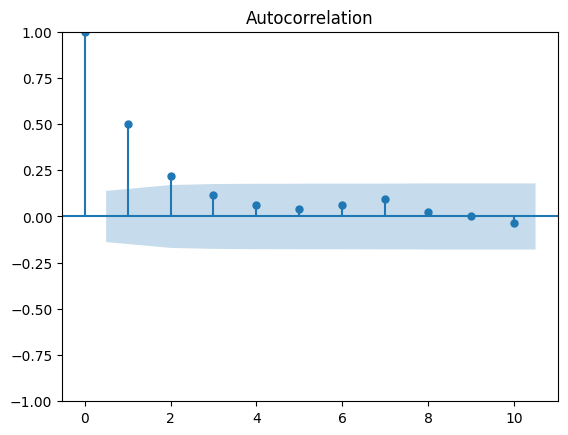

[ 1.          0.50296539  0.22091127  0.11686122  0.06040308  0.0382703
  0.06281649  0.09207996  0.02628865  0.00176565 -0.03775726]


In [ ]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import  acf
nlag = 10
result = acf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_acf(df_simulated['X'], lags = nlag)
plt.show()
print(result)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



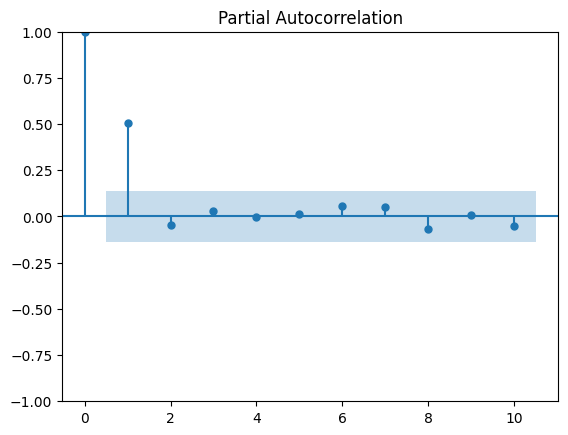

[ 1.          0.50549285 -0.04349406  0.03085008 -0.00452864  0.01164205
  0.05414861  0.0525279  -0.06836765  0.00549386 -0.05423122]


In [ ]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_pacf(df_simulated['X'], lags = 10)
plt.show()
print(result)